In [195]:
#import pandas
import pandas as pd

#import HDFS client to get the csv data
from hdfs import InsecureClient as InSC
import warnings
warnings.filterwarnings('ignore')

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [197]:
#Load CSV Data into Dataframe

# Connect to HDFS
hdfs_client = InSC('http://ric-worker1.uaeu.ac.ae:50070', user='duser65')

# Specify the file path
file_path = '/user/duser65/ExerciseDataSet_Bank_Marketing.csv'

# Read the CSV file from HDFS into a Pandas DataFrame
with hdfs_client.read(file_path) as file:
    bank_df = pd.read_csv(file)
    
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334.0,1,999.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383.0,1,999.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189.0,2,999.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442.0,1,999.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [200]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [201]:
bank_df.tail(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442.0,1,999.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239.0,3,999.0,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [202]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41169 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           41185 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [203]:
bank_df.shape

(41188, 21)

In [204]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'outcome'],
      dtype='object')

In [205]:
bank_df.rename(columns=
               {'emp.var.rate':'emp_var_rate', 
                'cons.price.idx':'cons_price_idx', 
                'cons.conf.idx': 'cons_conf_idx', 
                'nr.employed': 'nr_employed',
                'outcome' : 'y'}, inplace=True)
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [206]:
bank_df.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration          19
campaign           0
pdays              3
previous           0
poutcome           0
emp_var_rate       0
cons_price_idx     0
cons_conf_idx      0
euribor3m          0
nr_employed        0
y                  0
dtype: int64

In [207]:
# Quick look at the target variable
print("Target variable 'y' is yes or no -> classification problem")
print("Number of yes : " + str(bank_df[bank_df.y == "yes"].shape[0]))
print("Number of no : " + str(bank_df[bank_df.y == "no"].shape[0]))

# Encode it as integer for machine learning algorithms
bank_df = bank_df.replace({"y" : {"no" : 0, "yes" : 1}})

Target variable 'y' is yes or no -> classification problem
Number of yes : 4640
Number of no : 36548


NAs for duration : 19


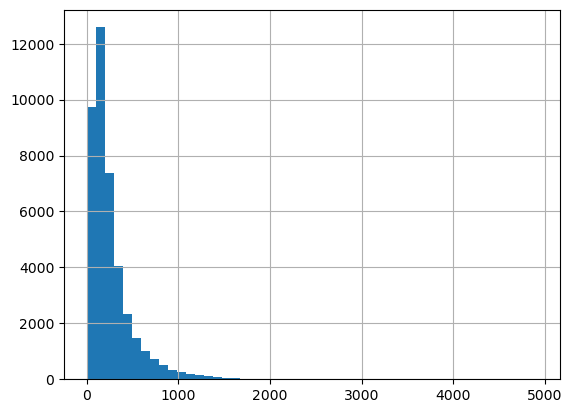

In [208]:
# duration
bank_df.duration.hist(bins = 50)
print("NAs for duration : " + str(bank_df.duration.isnull().values.sum()))
bank_df = bank_df.drop(["duration"], axis = 1)

999.0    39670
3.0        439
6.0        412
4.0        118
9.0         64
2.0         61
7.0         60
12.0        58
10.0        52
5.0         46
13.0        36
11.0        28
1.0         26
15.0        24
14.0        20
8.0         18
0.0         15
16.0        11
17.0         8
18.0         7
22.0         3
19.0         3
21.0         2
25.0         1
26.0         1
27.0         1
20.0         1
Name: pdays, dtype: int64


KeyError: 'key of type tuple not found and not a MultiIndex'

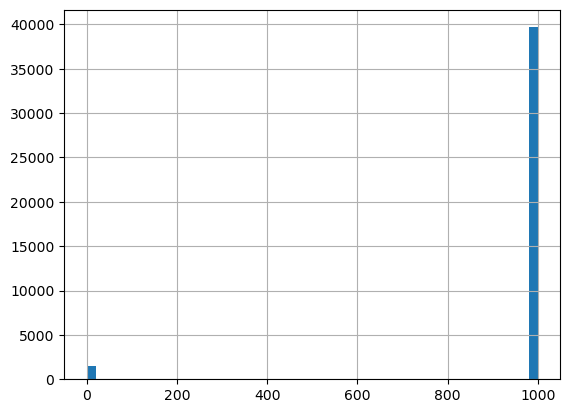

In [228]:
# pdays
bank_df.pdays.hist(bins = 50)
print(bank_df.pdays.value_counts())
#bank_df.pdays[bank_df["pdays"].isnull(), "pdays"] = 999.0
print("999 means client was not previously contacted")
print("NAs for pdays : " + str(bank_df.pdays.isnull().values.sum()))

NAs for age : 0


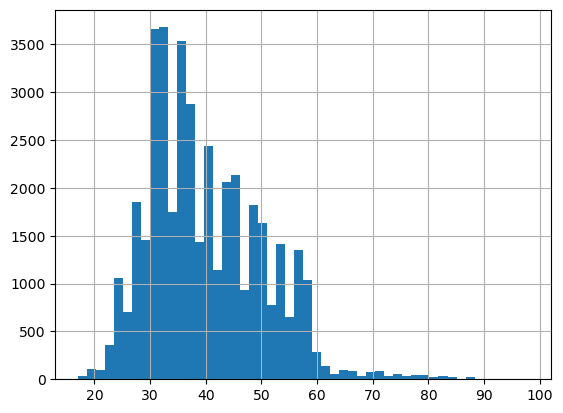

In [210]:
# age
bank_df.age.hist(bins = 50)
print("NAs for age : " + str(bank_df.age.isnull().values.sum()))

In [211]:
# job
print(bank_df.job.value_counts())
print("NAs for job : " + str(bank_df.job.isnull().values.sum()))
print("330 'unknown', impute most common value")
bank_df.loc[bank_df["job"] == "unknown", "job"] = "admin."

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
NAs for job : 0
330 'unknown', impute most common value


In [212]:
# marital
print(bank_df.marital.value_counts())
print("NAs for marital : " + str(bank_df.marital.isnull().values.sum()))
print("80 'unknown', impute most common value")
bank_df.loc[bank_df["marital"] == "unknown", "marital"] = "married"

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
NAs for marital : 0
80 'unknown', impute most common value


In [213]:
# education
print(bank_df.education.value_counts())
print("NAs for education : " + str(bank_df.education.isnull().values.sum()))
print("1731 'unknown', impute most common value")
bank_df.loc[bank_df["education"] == "unknown", "education"] = "university.degree"
print("basic.4y : left school at 10 years old")
print("basic.6y : left school at 12 years old")
print("basic.9y : left school at 15 years old")

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
NAs for education : 0
1731 'unknown', impute most common value
basic.4y : left school at 10 years old
basic.6y : left school at 12 years old
basic.9y : left school at 15 years old


In [214]:
# default
print(bank_df.default.value_counts())
print("NAs for default : " + str(bank_df.default.isnull().values.sum()))
print("8597 'unknown'")
print("Only 3 'yes' -> we'll discard this variable, not enough information in it")
bank_df = bank_df.drop(["default"], axis = 1)

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
NAs for default : 0
8597 'unknown'
Only 3 'yes' -> we'll discard this variable, not enough information in it


In [215]:
# housing
print(bank_df.housing.value_counts())
print("NAs for housing : " + str(bank_df.housing.isnull().values.sum()))
print("990 'unknown'. Since we have about same proportion of yes and no, let's impute NAs randomly")
bank_df.loc[bank_df["housing"] == "unknown", "housing"] = random.choice(["yes", "no"])

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
NAs for housing : 0
990 'unknown'. Since we have about same proportion of yes and no, let's impute NAs randomly


In [216]:
# loan
print(bank_df.loan.value_counts())
print("NAs for loan : " + str(bank_df.loan.isnull().values.sum()))
print("990 'unknown', impute most common value")
bank_df.loc[bank_df["loan"] == "unknown", "loan"] = "no"

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
NAs for loan : 0
990 'unknown', impute most common value


In [217]:
# contact
print(bank_df.contact.value_counts())
print("NAs for contact : " + str(bank_df.contact.isnull().values.sum()))

cellular     26144
telephone    15044
Name: contact, dtype: int64
NAs for contact : 0


In [218]:
# month
print(bank_df.month.value_counts())
print("NAs for month : " + str(bank_df.month.isnull().values.sum()))

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
NAs for month : 0


In [219]:
# day_of_week
print(bank_df.day_of_week.value_counts())
print("NAs for day_of_week : " + str(bank_df.day_of_week.isnull().values.sum()))

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
NAs for day_of_week : 0


1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64
NAs for campaign : 0


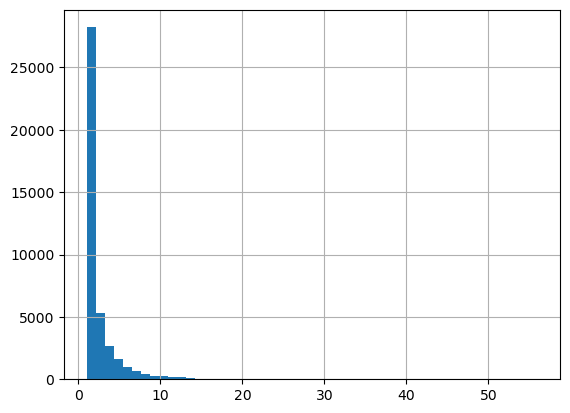

In [220]:
# campaign
print(bank_df.campaign.value_counts())
bank_df.campaign.hist(bins = 50)
print("NAs for campaign : " + str(bank_df.campaign.isnull().values.sum()))

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64
NAs for previous : 0


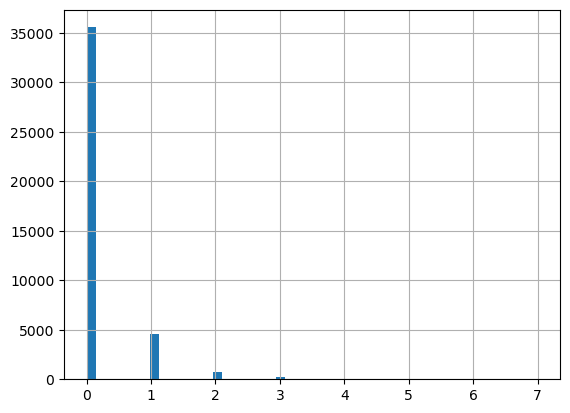

In [221]:
# previous
bank_df.previous.hist(bins = 50)
print(bank_df.previous.value_counts())
print("NAs for previous : " + str(bank_df.previous.isnull().values.sum()))

In [222]:
bank_df.shape

(41188, 19)

In [223]:
#variable imputation
cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']
df_cat = pd.get_dummies(bank_df[cols],drop_first=True)
df_final = pd.concat([bank_df,df_cat],axis=1)
df_final = df_final.drop(cols, axis=1)

df_final.shape

(41188, 46)

In [224]:
X = df_final.drop('y',axis=1)
y = df_final['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_test : " + str(y_train.shape))
print("y_train : " + str(y_train.shape))


X_train : (27595, 45)
X_test : (13593, 45)
y_test : (27595,)
y_train : (27595,)


In [225]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     12056
           1       0.25      0.70      0.37      1537

    accuracy                           0.73     13593
   macro avg       0.60      0.72      0.60     13593
weighted avg       0.87      0.73      0.78     13593

